Assignment:
This is data a client collected by hosting an Autism screening questionnaire on their website over the course of several months. Some of the variables are the results of individual screening questions (e.g. A1_Score), and others are information about the "patient" (e.g. Country_of_res). Your task is to determine which factors are most influential in predicting whether someone has ASD (Autism Spectrum Disorder), and to assess how predictable ASD is overall given the features collected in this dataset. Please remember that the focus of this challenge is on how you approach the problem, do exploratory analysis, and choose which predictors are appropriate to use, not on how thoroughly you perform hyperparameter tuning or on the number of different models you test, for example. Please also remember that we are not looking for a powerpoint presentation, and that "walking through" your code is completely appropriate.

# Autism Spectrum Disorder Case Study
#### Examining any relationship between personal factors and ASD diagnosis

### 1. Clean and Examine The Data

In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
# Read in the data
df = pd.read_csv('Autism-Adult-Data.csv')

In [3]:
# Make wide enough to see all columns and examine data
pd.set_option('display.max_columns', df.shape[0]+1)

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,App_result,Age_desc,Relation,ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [4]:
df.shape

(704, 21)

In [5]:
# Can check description. But measures of central tendency aren't super useful in this data set
# df.describe

In [6]:
# Examine what factors we have obtained from questionaire
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jundice', 'Family', 'Country_of_res', 'Used_app_before',
       'App_result', 'Age_desc', 'Relation', 'ASD'],
      dtype='object')

In [7]:
#Examine for appropriate datatypes
df.dtypes

A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
Age                object
Gender             object
Ethnicity          object
Jundice            object
Family             object
Country_of_res     object
Used_app_before    object
App_result          int64
Age_desc           object
Relation           object
ASD                object
dtype: object

In [8]:
df.Ethnicity.unique()

array(['White-European', 'Latino', '?', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish', 'others'], dtype=object)

For ease of usage I would like to edit some of the types of answers within some of the language based columns

In [9]:
# Since there is no discerneable difference for us between '?', 'Others', and 'Other' 
# they need to be reclassified as just one type

df.Ethnicity = df.Ethnicity.replace({'?':'Others','others':'Others'})

In [10]:
#Check for any issues 
df.Ethnicity.unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish'], dtype=object)

In [11]:
# Double check there aren't any misspelling issues or multiple classifications for one gender 
# i.e. 'f' vs 'F' vs 'Fem'
df.Gender.unique()

array(['f', 'm'], dtype=object)

In [12]:
# From header I can see United States is oddly formated. 
#Checking all of the different types.
df.Country_of_res.unique()

array(["'United States'", 'Brazil', 'Spain', 'Egypt', "'New Zealand'",
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       "'United Arab Emirates'", 'Afghanistan', 'Lebanon',
       "'United Kingdom'", "'South Africa'", 'Italy', 'Pakistan',
       'Bangladesh', 'Chile', 'France', 'China', 'Australia', 'Canada',
       "'Saudi Arabia'", 'Netherlands', 'Romania', 'Sweden', 'Tonga',
       'Oman', 'India', 'Philippines', "'Sri Lanka'", "'Sierra Leone'",
       'Ethiopia', "'Viet Nam'", 'Iran', "'Costa Rica'", 'Germany',
       'Mexico', 'Russia', 'Armenia', 'Iceland', 'Nicaragua',
       "'Hong Kong'", 'Japan', 'Ukraine', 'Kazakhstan', 'AmericanSamoa',
       'Uruguay', 'Serbia', 'Portugal', 'Malaysia', 'Ecuador', 'Niger',
       'Belgium', 'Bolivia', 'Aruba', 'Finland', 'Turkey', 'Nepal',
       'Indonesia', 'Angola', 'Azerbaijan', 'Iraq', "'Czech Republic'",
       'Cyprus'], dtype=object)

In [13]:
# As the file is not incredibly long instead of finding the different countries that
# have unnecessary quotation marks I will just strip the quotation marks in and of themselves instead of
# renaming by country name
for x in range(len(df)):
    df['Country_of_res'][x] = df['Country_of_res'][x].replace("'",'') 

<ipython-input-13-9eb2ee23acad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
# Check work
df.Country_of_res.unique()

array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Viet Nam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Hong Kong', 'Japan', 'Ukraine',
       'Kazakhstan', 'AmericanSamoa', 'Uruguay', 'Serbia', 'Portugal',
       'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia', 'Aruba',
       'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola', 'Azerbaijan',
       'Iraq', 'Czech Republic', 'Cyprus'], dtype=object)

In [15]:
# Check for missing data files
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
Age                0
Gender             0
Ethnicity          0
Jundice            0
Family             0
Country_of_res     0
Used_app_before    0
App_result         0
Age_desc           0
Relation           0
ASD                0
dtype: int64

In [16]:
# Need clarification on what app_result is 
# Since it seems to be organized numbers 0-10. I need to ask client for meaning.
df.App_result.unique()

array([ 6,  5,  8,  2,  9, 10,  4,  3,  0,  1,  7])

In [17]:
# On questionaire they ask if the patient is born with jaundice
df = df.rename(columns={"Jundice": "Jaundice"})

In [18]:
# Change yes/no categorical varibles to binary 0/1

df.ASD = df.ASD.map({'YES': 1, 'NO': 0})
df.Jaundice = df.Jaundice.map({'yes': 1, 'no': 0})
df.Family = df.Family.map({'yes': 1, 'no': 0})
df.Used_app_before = df.Used_app_before.map({'yes': 1, 'no': 0})

# Create new column for an encoded gender with 1 being male and 0 being female
df['GenderBinary'] = df.Gender.map({'m': 1, 'f': 0})

In [19]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jaundice,Family,Country_of_res,Used_app_before,App_result,Age_desc,Relation,ASD,GenderBinary
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,0,0,United States,0,6,'18 and more',Self,0,0
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,0,1,Brazil,0,5,'18 and more',Self,0,1
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,1,1,Spain,0,8,'18 and more',Parent,1,1
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,0,1,United States,0,6,'18 and more',Self,0,0
4,1,0,0,0,0,0,0,1,0,0,40,f,Others,0,0,Egypt,0,2,'18 and more',?,0,0


In [20]:
# Not useful due to the fact it only has one category
df.Age_desc.value_counts()

'18 and more'    704
Name: Age_desc, dtype: int64

In [21]:
df.Relation.value_counts()

Self                          522
?                              95
Parent                         50
Relative                       28
Others                          5
'Health care professional'      4
Name: Relation, dtype: int64

The adjustment of missing values, spelling errors, and encoding of categorical variables is complete.

### 2. Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

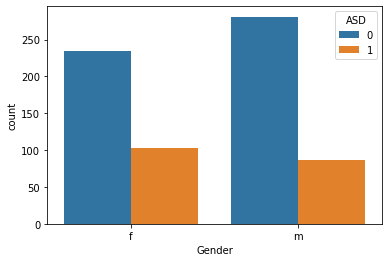

In [22]:
# Lets compare how the diagnosis rate varies between genders

sns.countplot(x='Gender', hue = 'ASD', data = df)

In [23]:
#Find the actual count of each Gender that filled survey
femaleTotal = df[df['Gender']=='f']['Gender'].count()
maleTotal = df[df['Gender']=='m']['Gender'].count()

#Find the actual count of each Gender that filled survey and positive for ASD
femalePos = df[(df['Gender']=='f') & (df['ASD'] == 1)]['Gender'].count()
malePos = df[(df['Gender']=='f') & (df['ASD'] == 1)]['Gender'].count()

#Find percentage
femalePer = femalePos/femaleTotal
malePer = malePos/maleTotal

In [24]:
#Coding a print out to give actual numbers for above countplot

print('There were ', femaleTotal, ' females represented in the survey. With ', '{0:.0%}'.format(femalePer), ' of women being diagnosed with Autism Spectrum Disorder.')
print('There were ', maleTotal, ' males represented in the survey. With ', '{0:.0%}'.format(malePer), ' of men being diagnosed with Autism Spectrum Disorder.')

There were  337  females represented in the survey. With  31%  of women being diagnosed with Autism Spectrum Disorder.
There were  367  males represented in the survey. With  28%  of men being diagnosed with Autism Spectrum Disorder.


It would appear that there is a slightly higher diagnosis for women with ASD than women. Can it be attributed to clinical biaseses, due to women having higher incidinces of austism, or should the 3% be considered negligible.

In [25]:
# Examine the ASD ratios based on Ethnicity if the category has over 100 completed questionnaires
df.groupby('Ethnicity')['Ethnicity'].count().sort_values(ascending = False)

Ethnicity
White-European       233
Others               126
Asian                123
'Middle Eastern '     92
Black                 43
'South Asian'         36
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
Name: Ethnicity, dtype: int64

<AxesSubplot:xlabel='Ethnicity', ylabel='count'>

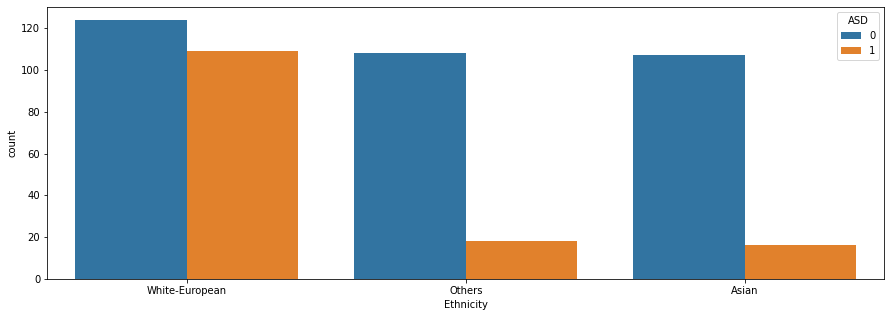

In [26]:
# Create list with more represented ethnicities

options = ['White-European', 'Others', 'Asian']
dfEthnic = df[df['Ethnicity'].isin(options)]

# Create countplot
plt.figure(figsize=(15,5))
sns.countplot(x='Ethnicity', hue = 'ASD', data = dfEthnic)

With this count plot we can see even when we narrow our frame to ethnicitys with larger data counts there is a much higher % of ASD diagnoseses for 'White-European' people. Is that due to access to healthcare, cultural differences, or ASD being based on true genetic differences. 

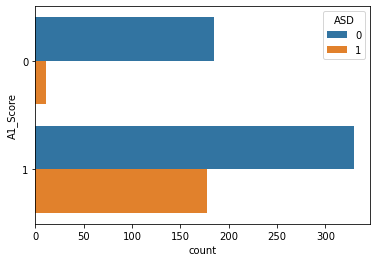

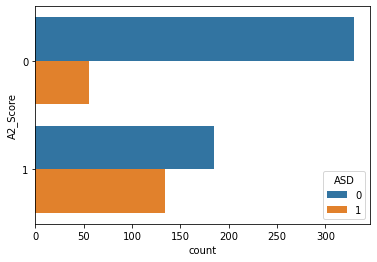

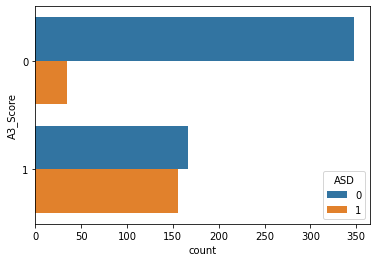

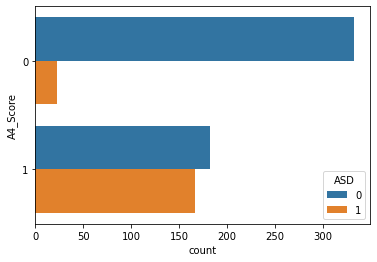

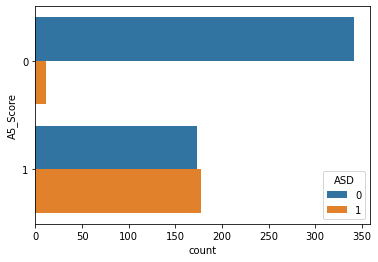

In [27]:
for col in ['A1_Score','A2_Score', 'A3_Score', 'A4_Score', 'A5_Score']:
    sns.countplot(y = col, hue = 'ASD', data = df )
    plt.show()

In [28]:
#Find the actual count of each Gender that filled survey
posTotal = df[df['Family']==1]['Family'].count()
negTotal = df[df['Family']==0]['Family'].count()

#Find the actual count of each Gender that filled survey and positive for ASD
posPos = df[(df['Family']==1) & (df['ASD'] == 1)]['Family'].count()
negPos = df[(df['Family']==0) & (df['ASD'] == 1)]['Family'].count()

#Find percentage
posPer = posPos/posTotal
negPer = negPos/negTotal

In [29]:
#Coding a print out to give actual numbers for above countplot

print('There were ', posTotal, ' persons who had family with PPD represented in the survey. With ', '{0:.0%}'.format(posPer), ' of them being diagnosed with Autism Spectrum Disorder.')
print('There were ', negTotal, ' persons who had family without PPD represented in the survey. With ', '{0:.0%}'.format(negPer), ' of them being diagnosed with Autism Spectrum Disorder.')

There were  91  persons who had family with PPD represented in the survey. With  47%  of them being diagnosed with Autism Spectrum Disorder.
There were  613  persons who had family without PPD represented in the survey. With  24%  of them being diagnosed with Autism Spectrum Disorder.


<AxesSubplot:xlabel='Family', ylabel='count'>

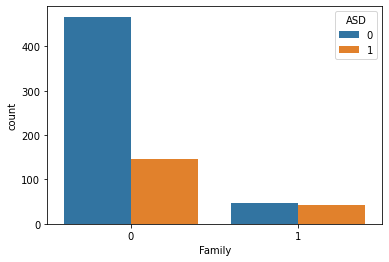

In [30]:
# Create countplot
sns.countplot(x='Family', hue = 'ASD', data = df)

<AxesSubplot:>

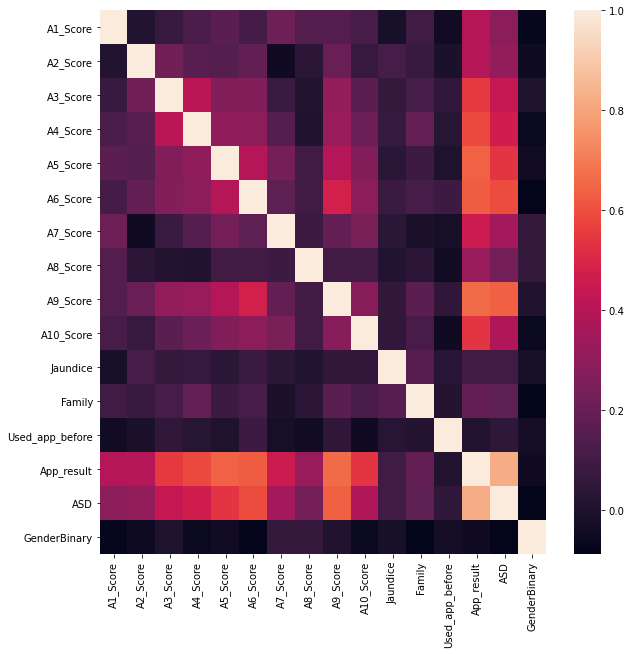

In [31]:
# Find correlation coefficients
corr = df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(corr)

In [32]:
corr

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Jaundice,Family,Used_app_before,App_result,ASD,GenderBinary
A1_Score,1.000000,0.011539,0.074096,0.127814,0.169369,0.110199,0.217538,0.147640,0.145452,0.118413,-0.019077,0.097630,-0.040620,0.397454,0.297628,-0.075011
A2_Score,0.011539,1.000000,0.223921,0.158998,0.153821,0.185864,-0.041768,0.035408,0.205421,0.068883,0.112615,0.074555,-0.009645,0.392540,0.311382,-0.047393
A3_Score,0.074096,0.223921,1.000000,0.412722,0.264927,0.268846,0.078216,0.017771,0.315113,0.168454,0.061760,0.113697,0.055320,0.552356,0.441074,0.000795
A4_Score,0.127814,0.158998,0.412722,1.000000,0.306806,0.295152,0.151236,0.008617,0.327673,0.210968,0.064918,0.193820,0.023071,0.586025,0.469945,-0.056508
A5_Score,0.169369,0.153821,0.264927,0.306806,1.000000,0.392354,0.238589,0.102086,0.396582,0.267561,0.034378,0.090009,0.000374,0.639706,0.537004,-0.039688
A6_Score,0.110199,0.185864,0.268846,0.295152,0.392354,1.000000,0.175489,0.100123,0.479422,0.294435,0.078366,0.114048,0.087378,0.630012,0.592091,-0.083615
A7_Score,0.217538,-0.041768,0.078216,0.151236,0.238589,0.175489,1.000000,0.085403,0.189480,0.252107,0.030850,-0.008610,-0.022505,0.454848,0.351429,0.061900
A8_Score,0.147640,0.035408,0.017771,0.008617,0.102086,0.100123,0.085403,1.000000,0.101733,0.100782,0.012101,0.034845,-0.041155,0.324020,0.237161,0.064127
A9_Score,0.145452,0.205421,0.315113,0.327673,0.396582,0.479422,0.189480,0.101733,1.000000,0.283340,0.057717,0.167644,0.049567,0.661205,0.635576,0.006940
A10_Score,0.118413,0.068883,0.168454,0.210968,0.267561,0.294435,0.252107,0.100782,0.283340,1.000000,0.052201,0.117969,-0.041860,0.537205,0.385917,-0.055246


Looking at the 'ASD' diagnosis on our heatmap we can see questions 5, 6, and 9 on our questionnaire have higher correlations to an 'ASD' diagnosis (0.537, 0.592, 0.636) than other factors. The app result has a very high correlation to an ASD diagnosis. Based on this we can assume our app has fairly high accuracy in predicting whether a patient has ASD or not.

### Machine Learning

### Random Forest

In [33]:
# import machine learning packages

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [34]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Ethnicity', 'Jaundice', 'Family', 'Country_of_res', 'Used_app_before',
       'App_result', 'Age_desc', 'Relation', 'ASD', 'GenderBinary'],
      dtype='object')

In [35]:
# Preprocessing. One hot encode the variables 'Ethnicity' 'Country_of_res' and 'Relation'
df = pd.get_dummies(df,columns=['Ethnicity', 'Country_of_res', 'Relation'],drop_first=True)

In [36]:
# Also drop Age_desc since it has only one category and doesn't add value to our machine learning
df = df.drop('Age_desc', axis = 1)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Jaundice,Family,Used_app_before,App_result,ASD,GenderBinary,Ethnicity_'South Asian',Ethnicity_Asian,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Latino,Ethnicity_Others,Ethnicity_Pasifika,Ethnicity_Turkish,Ethnicity_White-European,Country_of_res_AmericanSamoa,Country_of_res_Angola,Country_of_res_Argentina,Country_of_res_Armenia,Country_of_res_Aruba,Country_of_res_Australia,Country_of_res_Austria,Country_of_res_Azerbaijan,Country_of_res_Bahamas,Country_of_res_Bangladesh,Country_of_res_Belgium,Country_of_res_Bolivia,Country_of_res_Brazil,Country_of_res_Burundi,Country_of_res_Canada,Country_of_res_Chile,Country_of_res_China,Country_of_res_Costa Rica,Country_of_res_Cyprus,Country_of_res_Czech Republic,Country_of_res_Ecuador,Country_of_res_Egypt,Country_of_res_Ethiopia,Country_of_res_Finland,Country_of_res_France,Country_of_res_Germany,Country_of_res_Hong Kong,Country_of_res_Iceland,Country_of_res_India,Country_of_res_Indonesia,Country_of_res_Iran,Country_of_res_Iraq,Country_of_res_Ireland,Country_of_res_Italy,Country_of_res_Japan,Country_of_res_Jordan,Country_of_res_Kazakhstan,Country_of_res_Lebanon,Country_of_res_Malaysia,Country_of_res_Mexico,Country_of_res_Nepal,Country_of_res_Netherlands,Country_of_res_New Zealand,Country_of_res_Nicaragua,Country_of_res_Niger,Country_of_res_Oman,Country_of_res_Pakistan,Country_of_res_Philippines,Country_of_res_Portugal,Country_of_res_Romania,Country_of_res_Russia,Country_of_res_Saudi Arabia,Country_of_res_Serbia,Country_of_res_Sierra Leone,Country_of_res_South Africa,Country_of_res_Spain,Country_of_res_Sri Lanka,Country_of_res_Sweden,Country_of_res_Tonga,Country_of_res_Turkey,Country_of_res_Ukraine,Country_of_res_United Arab Emirates,Country_of_res_United Kingdom,Country_of_res_United States,Country_of_res_Uruguay,Country_of_res_Viet Nam,Relation_?,Relation_Others,Relation_Parent,Relation_Relative,Relation_Self
0,1,1,1,1,0,0,1,1,0,0,26,f,0,0,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,1,0,0,0,1,0,1,24,m,0,1,0,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,1,0,1,1,1,1,27,m,1,1,0,8,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,1,1,0,1,35,f,0,1,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,40,f,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
#Create a list of features
features_list = list(df.drop(['Gender','ASD'], axis = 1).columns)

In [38]:
# Assign X & y values
X = df[features_list]
y = df['ASD']

In [39]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ValueError: could not convert string to float: '?'

# CHANGE TYPES ON AGE